# I-94 Interstate Highway Project

We've all been there, stuck bumper to bumper looking at our navigation system to tell us the cause of traffic. Car accidents, bad weather, and time of day are a few indicator examples of traffic ahead. This project will dive deep into the  I-94 interstate highway dataset and look for any indicators that correlate with heavy traffic. Data visualization will be implemented in this project by using matplotlib. 

Importing the tools that may be needed to analyze and visualize the data.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

I will be naming the dataset **highway**.

In [30]:
# Reading the file
highway = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

Printing out the first and last 5 rows to get an idea of the data that I'm working with. 

This is also important so I can see if there is anything that needs to be cleaned. 

In [31]:
# First 5 rows
highway.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [32]:
# Last 5 rows
highway.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


The dataset above shows that I'm working with 48,203 rows and 9 columns. All of the data appears to be clean.  

I can look at the at the dataset and get an idea of the datatypes of the columns but I will go ahead and use `highway.info()` just to confirm. 

In [33]:
# Getting the info of the datatypes inside the columns
highway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


As illustrated above, we have 4 string object columns, 3 float columns, and 2 integer columns. None of the columns have any Null values which is good. 

I'd like focus on the *traffic_volume* column because it can potentially give us good insite on things it correlates with. 
A histogram will be used visualize the *traffic_volume* column.

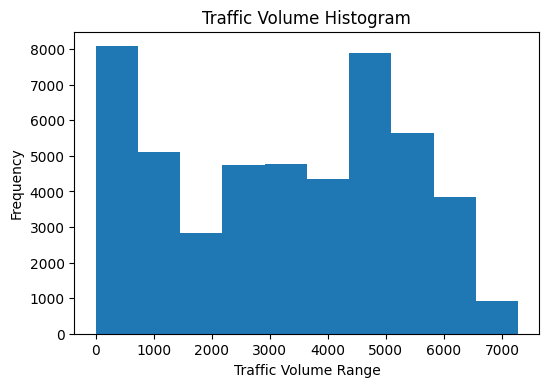

In [34]:
plt.hist(highway['traffic_volume'])
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume Range')
plt.title('Traffic Volume Histogram')
plt.show()

The range of numbers in the *traffic_volume* column is on the x-axis. The frequency of those ranges is on the y-axis. 

The histogram shows that the ranges (0 - 1000) meaning that there is a good amount of cases where there is virtually little to no traffic on the road. 
5000 is also one of the peak ranges in the *traffic_volume* column which means that when there is traffic, theres is a high probability that there will be 5,000 vehicles on the road. 

Next, I will use `highway['traffic_volume'].describe()` to show things like the mean, percantile ranges and standard deviation to get a better sense of the traffic numbers. 

In [35]:
highway['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

According to the above, the `traffic_volume` column has a mean of 3259, and a standard deviation of 1986. Now it's safe to say that the average volume of cars that pass on the I-94 can be a sign of when traffic starts to build.

I will go ahead and convert the `highway['date_time']` column in into a datetime object. After that, I will be splitting the hours between "day time" and "night time" to compare them. 

In [36]:
highway['date_time'] = pd.to_datetime(highway['date_time'])
highway.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


Now, I'm going to split the time column into day time (7am - 7pm) then night time (7pm - 7am).

In [37]:
day_time = highway.copy()[(highway['date_time'].dt.hour >= 7) & (highway['date_time'].dt.hour < 19)]
print(day_time.shape)

night_time = highway.copy()[(highway['date_time'].dt.hour >= 19) | (highway['date_time'].dt.hour < 7)]
print(night_time.shape)

(23877, 9)
(24327, 9)


Now to use `.describe()` to get the mean, standard deviation, and percentage of the datasets day_time and night_time respectfully. 

In [38]:
day_time['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [39]:
night_time['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

It's worth noting that the traffic_volume column in the night_time dataset has a significantly lower mean than the day_time dataset. This is to be expected since traffic is most likely during the day time. 

**Now let's take a look at traffic volume by the month**

In [40]:
day_time['month'] = day_time['date_time'].dt.month
by_month = day_time.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

Now I'm going to visualize the data in `by_month`.  

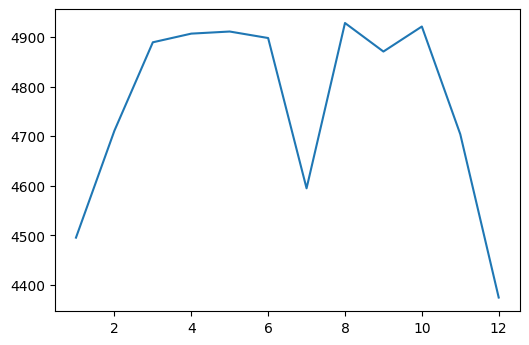

In [41]:
plt.plot(by_month['traffic_volume'])
plt.show()

I do notice that theres a dip in traffic that correlates with the holiday season with work and schools. One dip happening in the summer and another dip happening during the winter. 

Next I will look at how the `traffic_volume` correlates with the days of the week. 

In [42]:
day_time['dayofweek'] = day_time['date_time'].dt.dayofweek
by_dayofweek = day_time.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

The series above shows the frequencies of each day in the week. This can also be illustrated using a line graph. 

###### Now to draw a line graph for the week.

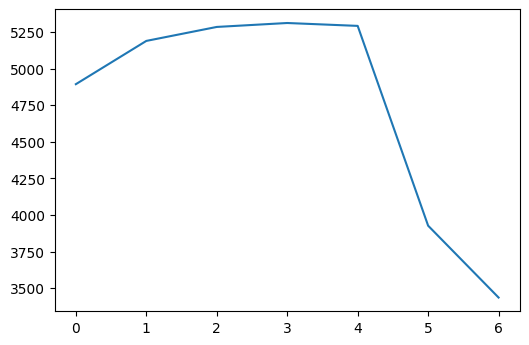

In [43]:
plt.plot(by_dayofweek['traffic_volume'])
plt.show()

As expected, the line graph shows the weekdays having more traffic than the weekend. 

Let's split the series between weekdays and weekend so that we can analyze them separately. 


In [44]:
#Separating the weekend from the weekdays
day_time['hour'] = day_time['date_time'].dt.hour
bussiness_days = day_time.copy()[day_time['dayofweek'] <= 4]
weekend = day_time.copy()[day_time['dayofweek'] >= 5]

#Now get the mean volume by the hour.
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


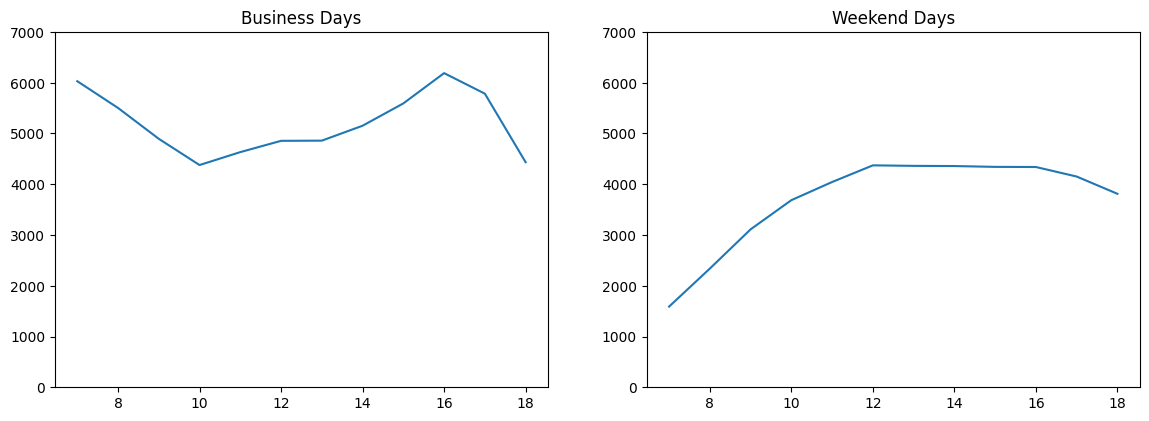

In [45]:
plt.figure(figsize=(14, 16))
plt.subplot(3,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.ylim(0,7000)
plt.title('Business Days')

plt.subplot(3,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.ylim(0,7000)
plt.title('Weekend Days')

plt.show()

The charts show that business days see far more volume of traffic on average than weekend days. This makes sense especially considering that business also line up with the school day schedule.  The chart shows that the rush hours peak at 7am and 3pm on business days. This looks like the commuting process going to and from work/school. The weekend days look relatively the same as the business days chart without the peaks of rush hour. 

In [46]:
def correlation(series1, series2):
    return series1.corr(series2)

print(correlation(day_time['traffic_volume'], day_time['temp']))
print(correlation(day_time['traffic_volume'], day_time['rain_1h']))
print(correlation(day_time['traffic_volume'], day_time['snow_1h']))
print(correlation(day_time['traffic_volume'], day_time['clouds_all']))


0.12831656852303905
0.0036965098350734324
0.001265349847175986
-0.03293234866163948


The temperature seems to be the strongest correlation but its stil not strong sitting at .13. The rest basically have null correlation. 

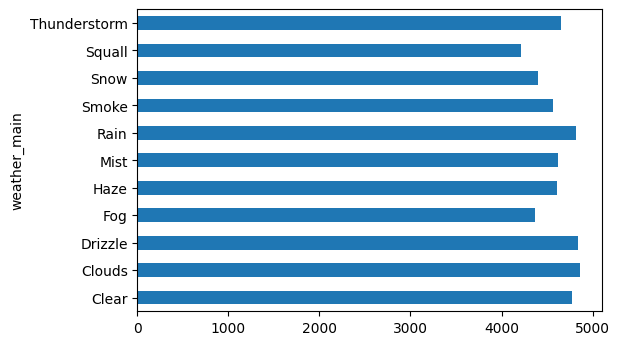

In [47]:
by_weather_main = day_time.groupby('weather_main').mean()
by_weather_description = day_time.groupby('weather_description').mean()
by_weather_main['traffic_volume'].plot.barh()

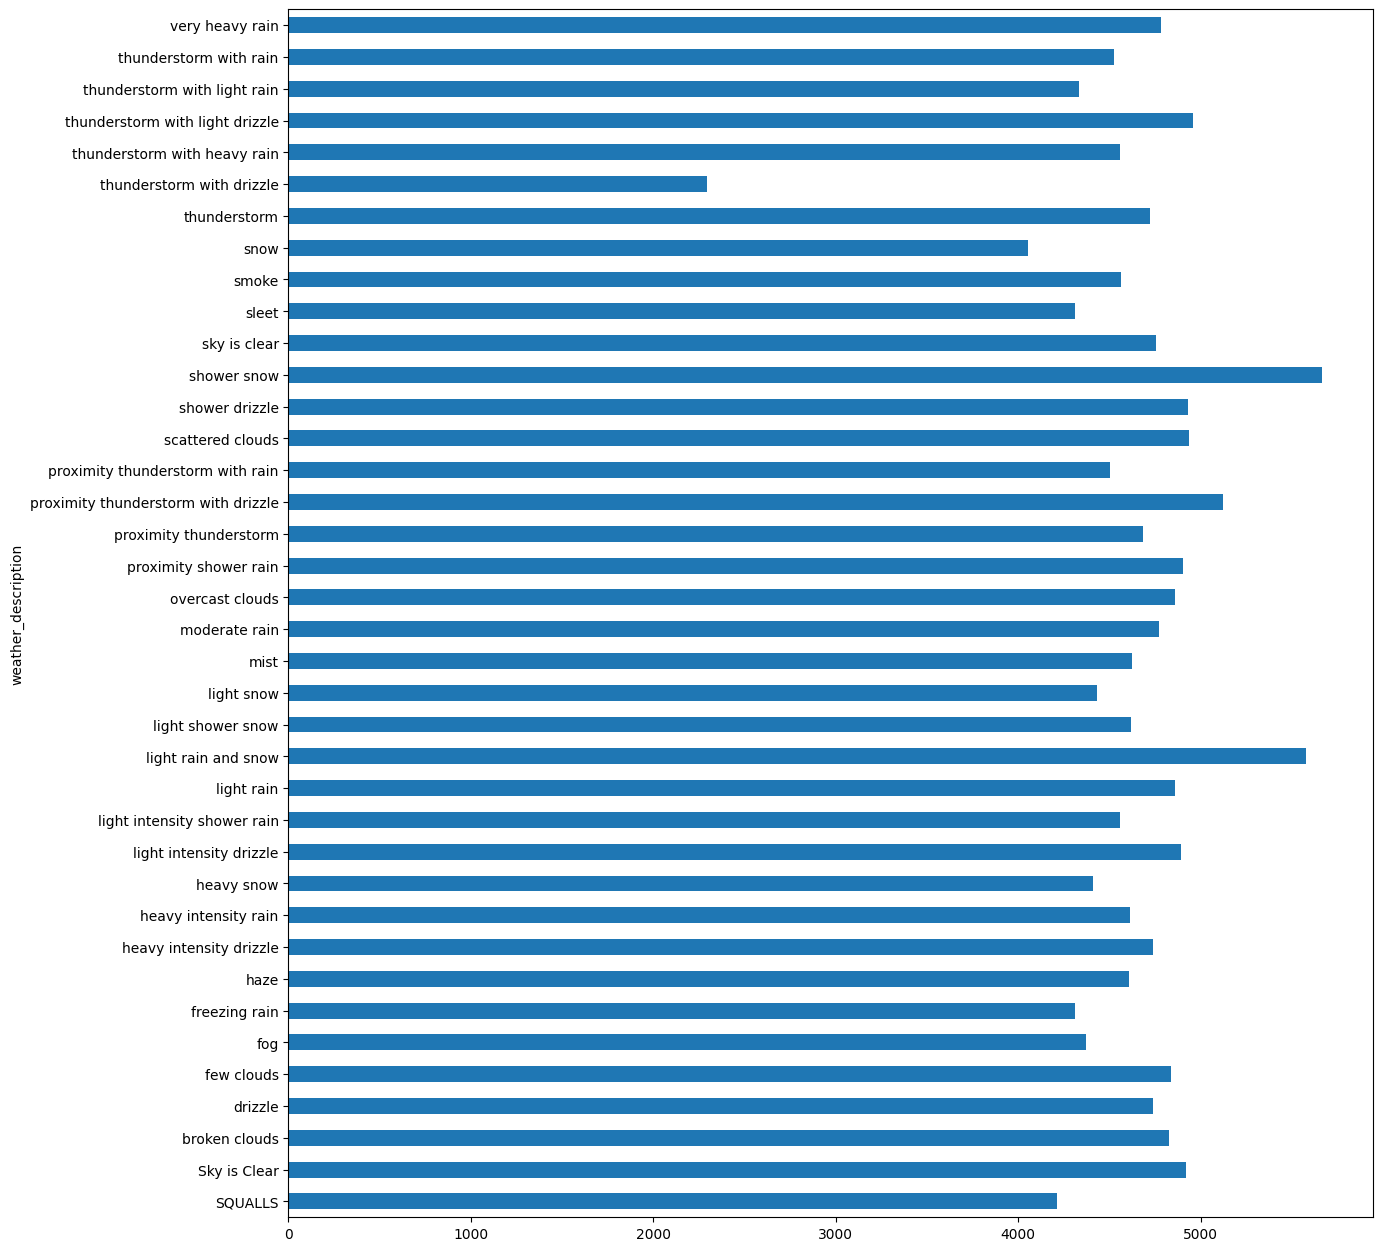

In [48]:
plt.figure(figsize=(14,16))
by_weather_description['traffic_volume'].plot.barh()
plt.show()

After analyzing the data and charts, it looks like the primary indicator of traffic for the I-94 interstate highway is the time of day. All of the other potential indicators ended up having little to no correlation with the traffic.   If someone was to try to avoid heavy traffic, they would have to leave early morning, in between the two rush hours, at night, or holiday season. If that someone wasn't able to do any of that, the data suggests they plan ahead, and leave earlier to avoid sitting in traffic. 